<a href="https://colab.research.google.com/github/LeTienNhan20104048/LeTienNhan20104048/blob/main/Nh%E1%BA%A1c_c%E1%BB%A5_c%E1%BB%95_truy%E1%BB%81n_Vi%E1%BB%87t_Nam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/PJ/Các loại nhạc cụ

/content/drive/MyDrive/PJ/Các loại nhạc cụ


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/PJ/Các loại nhạc cụ/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 592 images belonging to 8 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/PJ/Các loại nhạc cụ/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 103 images belonging to 8 classes.


In [ ]:
training_set.class_indices

{'Congchieng': 0,
 'Dandoan': 1,
 'Dannhi_danco': 2,
 'Dantiba': 3,
 'Dantranhvietnam': 4,
 'Khen': 5,
 'Saotruc': 6,
 'danda': 7}

In [ ]:
validation.class_indices

{'Congchieng': 0,
 'Dandoan': 1,
 'Dannhi_danco': 2,
 'Dantiba': 3,
 'Dantranhvietnam': 4,
 'Khen': 5,
 'Saotruc': 6,
 'danda': 7}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(8,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_25 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
19/19 [==============================] - 101s 6s/step - loss: 2.0828 - accuracy: 0.1588 - val_loss: 1.9883 - val_accuracy: 0.1845
Epoch 2/100
19/19 [==============================] - 13s 710ms/step - loss: 1.9809 - accuracy: 0.2618 - val_loss: 1.9416 - val_accuracy: 0.2136
Epoch 3/100
19/19 [==============================] - 13s 705ms/step - loss: 1.8481 - accuracy: 0.3041 - val_loss: 1.8809 - val_accuracy: 0.2330
Epoch 4/100
19/19 [==============================] - 14s 740ms/step - loss: 1.7541 - accuracy: 0.3514 - val_loss: 1.6546 - val_accuracy: 0.3981
Epoch 5/100
19/19 [==============================] - 13s 708ms/step - loss: 1.6769 - accuracy: 0.4071 - val_loss: 1.5615 - val_accuracy: 0.3883
Epoch 6/100
19/19 [==============================] - 13s 711ms/step - loss: 1.5894 - accuracy: 0.4324 - val_loss: 1.4956 - val_accuracy: 0.5631
Epoch 7/100
19/19 [==============================] - 13s 710ms/step - loss: 1.5279 - accuracy: 0.4662 - val_loss: 1.4851 - val_accuracy: 0

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.012466499581933022
Train Accuracy 0.9949324131011963


<function matplotlib.pyplot.show(*args, **kw)>

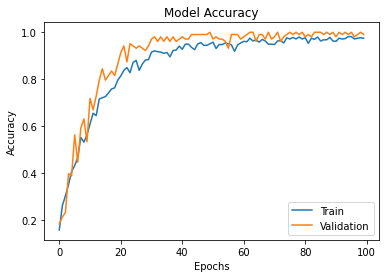

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("NC.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model('NC.h5')

In [ ]:
test="/content/drive/MyDrive/PJ/Các loại nhạc cụ/Test/Test1"

1/1 [==============================] - 0s 86ms/step
Cồng Chiêng 


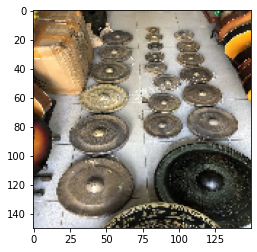

1/1 [==============================] - 0s 19ms/step
Cồng Chiêng 


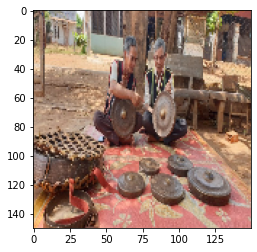

1/1 [==============================] - 0s 17ms/step
Cồng Chiêng 


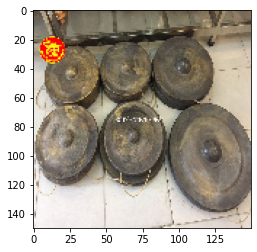

1/1 [==============================] - 0s 18ms/step
Đàn đá


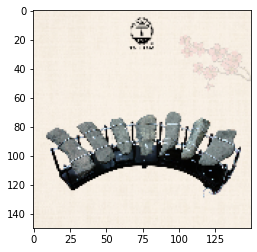

1/1 [==============================] - 0s 16ms/step
Đàn đá


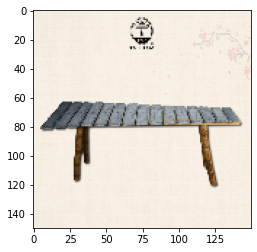

1/1 [==============================] - 0s 17ms/step
Đàn đá


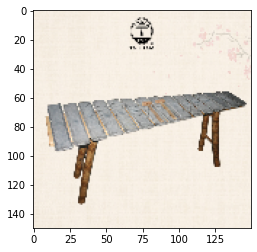

1/1 [==============================] - 0s 19ms/step
 Đàn Đoản 


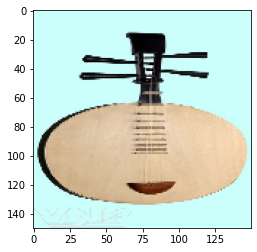

1/1 [==============================] - 0s 18ms/step
 Đàn Đoản 


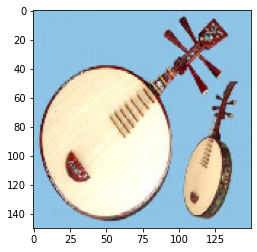

1/1 [==============================] - 0s 16ms/step
 Đàn Đoản 


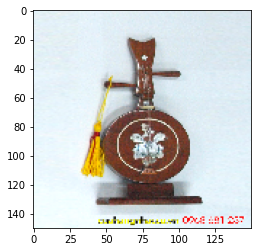

1/1 [==============================] - 0s 25ms/step
Đàn Nhị ( Đàn cò )


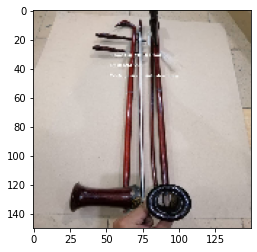

1/1 [==============================] - 0s 17ms/step
Đàn Nhị ( Đàn cò )


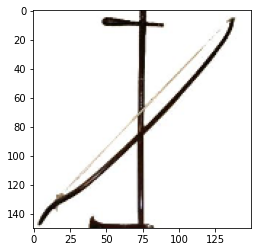

1/1 [==============================] - 0s 16ms/step
Đàn Nhị ( Đàn cò )


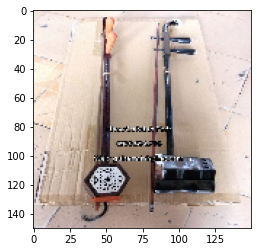

1/1 [==============================] - 0s 18ms/step
Đàn tì bà 


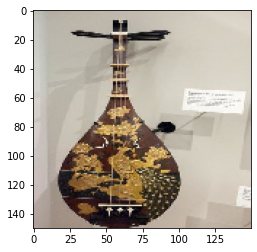

1/1 [==============================] - 0s 17ms/step
Đàn tì bà 


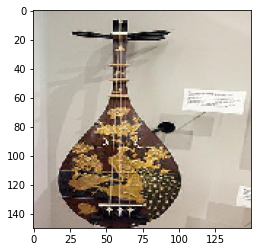

1/1 [==============================] - 0s 16ms/step
Đàn tì bà 


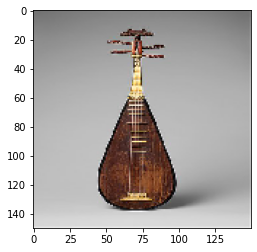

1/1 [==============================] - 0s 15ms/step
Đàn tì bà 


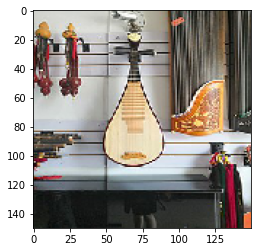

1/1 [==============================] - 0s 16ms/step
Đàn Tranh 


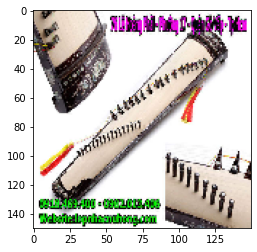

1/1 [==============================] - 0s 17ms/step
Đàn Tranh 


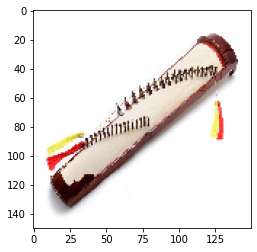

1/1 [==============================] - 0s 16ms/step
Đàn Tranh 


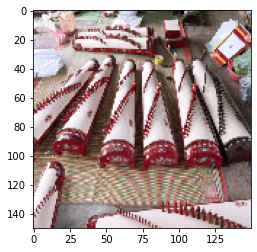

1/1 [==============================] - 0s 18ms/step
Đàn Tranh 


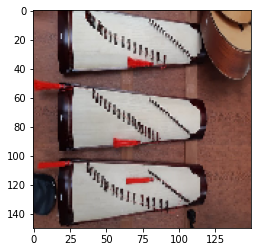

1/1 [==============================] - 0s 16ms/step
Khèn 


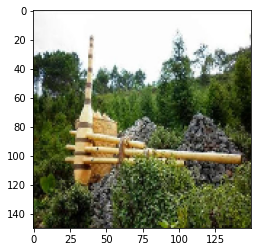

1/1 [==============================] - 0s 16ms/step
Khèn 


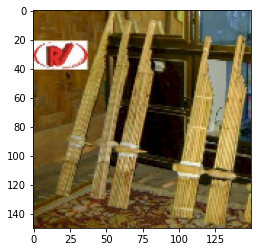

1/1 [==============================] - 0s 19ms/step
Khèn 


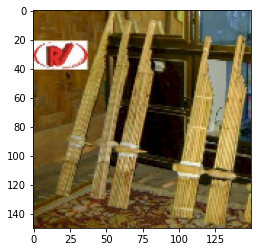

1/1 [==============================] - 0s 15ms/step
Sáo Trúc


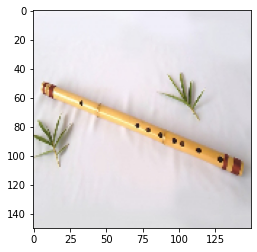

1/1 [==============================] - 0s 16ms/step
Sáo Trúc


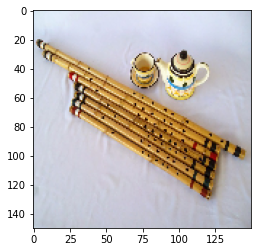

1/1 [==============================] - 0s 18ms/step
Sáo Trúc


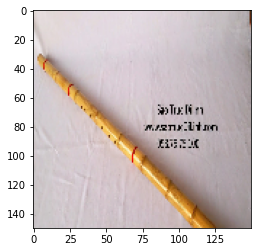

In [ ]:
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Cồng Chiêng '
  if round(result[0][1])==1:
    prediction=' Đàn Đoản '
  if round(result[0][2])==1:
    prediction='Đàn Nhị ( Đàn cò )'
  if round(result[0][3])==1:
    prediction='Đàn tì bà '
  if round(result[0][4])==1:
    prediction='Đàn Tranh '
  if round(result[0][5])==1:
    prediction='Khèn '
  if round(result[0][6])==1:
    prediction='Sáo Trúc'
  if round(result[0][7])==1:
    prediction='Đàn đá'  
  print(prediction)
  plt.show()